In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel(r'C:\Users\Sachin Mittal\Desktop\data.xlsx')
df.head()

,Temperature (°C),Mass Loss (%),Density (g/cc),Porosity (%),P-Wave (m/s),S-Wave (m/s),TC (W/mK),Damage,Ed (GPa)
0,25,0.0,2.666755,1.12000,3683.000,2173.000,2.393781,0.0,36.173170
1,25,0.0,2.693423,1.13120,3719.830,2194.730,2.417719,0.0,37.269253
2,25,0.0,2.690756,1.13008,3716.147,2192.557,2.415325,0.0,37.158662
3,25,0.0,2.688089,1.12896,3712.464,2190.384,2.412931,0.0,37.048289
4,25,0.0,2.685422,1.12784,3708.781,2188.211,2.410537,0.0,36.938136


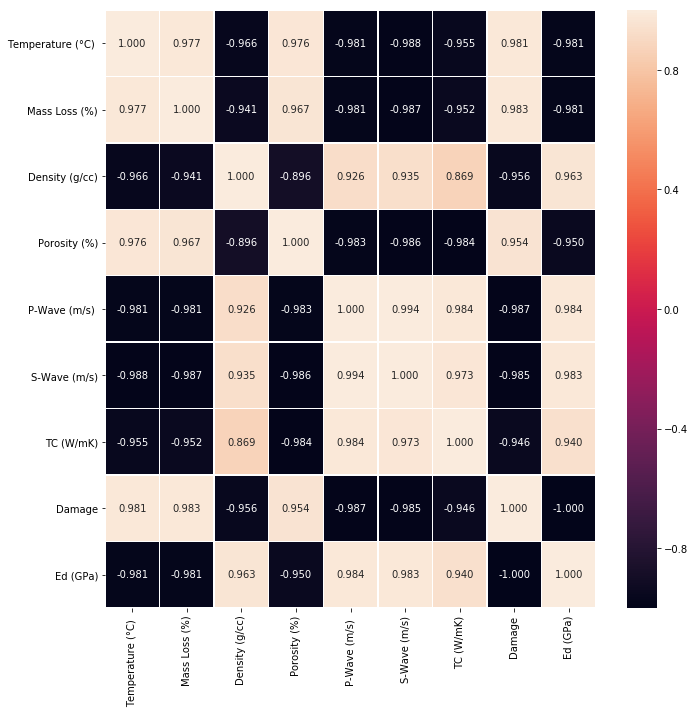

In [10]:
#correlation map
f,ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.03f',ax=ax)
plt.show()

In [37]:
import numpy as np
X=np.array(df.drop(['TC (W/mK)','Damage','Ed (GPa)'],1))
X.shape

(80, 6)

In [38]:
y=np.array(df['TC (W/mK)'])
y

array([2.39378089, 2.41771869, 2.41532491, 2.41293113, 2.41053735,
       2.40814357, 2.40574979, 2.40335601, 2.3813    , 2.405113  ,
       2.4027317 , 2.4003504 , 2.3979691 , 2.3955878 , 2.3932065 ,
       2.3908252 , 2.3413    , 2.364713  , 2.3623717 , 2.3600304 ,
       2.3576891 , 2.3553478 , 2.3530065 , 2.3506652 , 2.193     ,
       2.21493   , 2.212737  , 2.210544  , 2.208351  , 2.206158  ,
       2.203965  , 2.201772  , 2.012     , 2.03212   , 2.030108  ,
       2.028096  , 2.026084  , 2.024072  , 2.02206   , 2.020048  ,
       1.867     , 1.88567   , 1.883803  , 1.881936  , 1.880069  ,
       1.878202  , 1.876335  , 1.874468  , 1.5981    , 1.614081  ,
       1.6124829 , 1.6108848 , 1.6092867 , 1.6076886 , 1.6060905 ,
       1.6044924 , 0.914     , 0.92314   , 0.922226  , 0.921312  ,
       0.920398  , 0.919484  , 0.91857   , 0.917656  , 0.623     ,
       0.62923   , 0.628607  , 0.627984  , 0.627361  , 0.626738  ,
       0.626115  , 0.625492  , 0.511     , 0.51611   , 0.51559

In [39]:
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
clf=LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9880576342054135

In [40]:
import keras


Using TensorFlow backend.


In [41]:
from sklearn.metrics import accuracy_score
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [311]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(6,activation='relu'))
    #model.add(Dense(4,activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [42]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, verbose=0)

NameError: name 'baseline_model' is not defined

In [313]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X_train,y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

KeyboardInterrupt: 

In [314]:
estimator.fit(X_train, y_train)
prediction = estimator.predict(X_test)
#accuracy_score(y_test, prediction)
prediction

array([1.3933761 , 2.1510317 , 2.1447322 , 0.63597643, 1.6755915 ,
       0.691369  , 0.6945928 , 0.6933032 , 1.381306  , 0.6926585 ,
       1.6658262 , 1.0157949 , 2.446873  , 0.6324573 , 1.3906938 ,
       1.8815976 , 2.444477  , 2.4641612 , 2.4348924 , 2.1531315 ],
      dtype=float32)

In [287]:
y_test

array([1.6124829 , 2.210544  , 2.203965  , 0.514066  , 1.878202  ,
       0.625492  , 0.628607  , 0.627361  , 1.5981    , 0.626738  ,
       1.867     , 0.917656  , 2.41532491, 0.511     , 1.6092867 ,
       2.030108  , 2.41293113, 2.3530065 , 2.40335601, 2.212737  ])

In [315]:
mean_squared_error(y_test,prediction)

0.016447197602478418

In [43]:
from sklearn import linear_model

In [44]:
clf = linear_model.Ridge(alpha=0)
clf.fit(X_train, y_train) 

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [45]:
s = clf.predict(X_test)

In [46]:
y_test

array([1.6124829 , 2.210544  , 2.203965  , 0.514066  , 1.878202  ,
       0.625492  , 0.628607  , 0.627361  , 1.5981    , 0.626738  ,
       1.867     , 0.917656  , 2.41532491, 0.511     , 1.6092867 ,
       2.030108  , 2.41293113, 2.3530065 , 2.40335601, 2.212737  ])

In [47]:
sum((s-y_test)**2)/20

0.006314341721021265

In [48]:
clf = linear_model.Lasso(alpha=0)
clf.fit(X_train, y_train) 

C:\Users\Sachin Mittal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\Sachin Mittal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Sachin Mittal\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [49]:
s = clf.predict(X_test)

In [50]:
sum((s-y_test)**2)/20

0.006301664500620224

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

In [53]:
>>> from sklearn.metrics import mean_squared_error

In [54]:
>>> mean_squared_error(y_test, est.predict(X_test))    

2.2399770199486982e-05

In [55]:
est.predict(X_test)

array([1.61169632, 2.20452853, 2.20452853, 0.51911883, 1.88320982,
       0.62824601, 0.62893606, 0.62893606, 1.60287782, 0.62824601,
       1.87323958, 0.9202208 , 2.40571589, 0.51911883, 1.61169632,
       2.03445053, 2.40571589, 2.35010338, 2.40265189, 2.21870207])

In [56]:
y_test

array([1.6124829 , 2.210544  , 2.203965  , 0.514066  , 1.878202  ,
       0.625492  , 0.628607  , 0.627361  , 1.5981    , 0.626738  ,
       1.867     , 0.917656  , 2.41532491, 0.511     , 1.6092867 ,
       2.030108  , 2.41293113, 2.3530065 , 2.40335601, 2.212737  ])

In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
from sklearn.ensemble import AdaBoostRegressor

In [59]:
regr_1 = DecisionTreeRegressor(max_depth=4)

In [60]:

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=np.random.RandomState(1))

In [61]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=<mtrand.RandomState object at 0x000001F0DD3A0B88>)

In [62]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [63]:
mean_squared_error(y_1,y_test)    

3.8908902379215134e-05

In [64]:
mean_squared_error(y_2,y_test)

1.204542485861907e-05

In [85]:
(y_2-y_test)/y_2*100

array([ 0.        ,  0.05665722, -0.15945784,  0.09930487, -0.07958615,
        0.09950249,  0.0990099 , -0.09940358,  0.39840637, -0.09950249,
        0.42674253,  0.09950249, -0.28316154,  0.69513406, -0.13258204,
       -0.21282633, -0.22465712,  0.09940358, -0.00852183,  0.00990982])

In [65]:
from sklearn.ensemble import RandomForestRegressor

In [66]:
 regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)

In [67]:
regr.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [68]:
result=regr.predict(X_test)

In [69]:
result

array([1.8572561 , 2.34659771, 2.33634704, 0.5596941 , 1.8572561 ,
       0.56778834, 0.56778834, 0.56778834, 1.8572561 , 0.56778834,
       1.8572561 , 0.91991545, 2.34659771, 0.5596941 , 1.8572561 ,
       1.89176796, 2.34659771, 2.34659771, 2.34659771, 2.34659771])

In [70]:
mean_squared_error(result,y_test)

0.014654371415649394

In [71]:
X_train.shape

(60, 6)

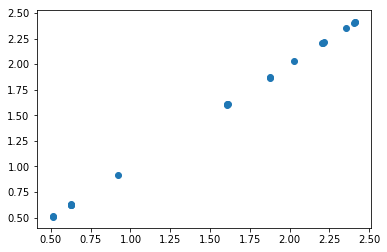

In [80]:
plt.scatter(y_2,y_test)
plt.show()

In [77]:
X=X=np.array(df.drop(['S-Wave (m/s)','Porosity (%)','Mass Loss (%)','TC (W/mK)','Damage','Ed (GPa)'],1))
X.shape

(80, 3)

In [78]:
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
clf=LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9852011614617358

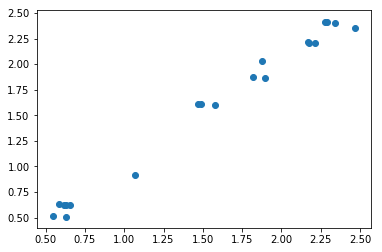

In [82]:
plt.scatter(clf.predict(X_test),y_test)
plt.show()